# Telcom Customer Churn Prediction

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [283]:
df = pd.read_csv("C:/Data/Telco-Customer-Churn.csv")

In [284]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [285]:
df.shape

(7043, 21)

In [286]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not.

In [287]:
df.drop(["customerID"], inplace = True, axis = 1)

In [288]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

#### Gender, SeniorCitizen, Partner, Dependents

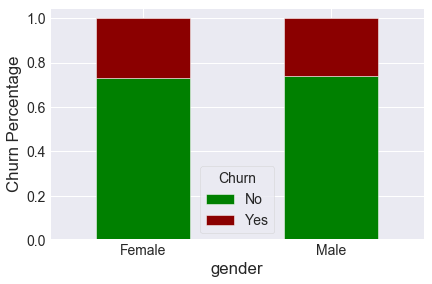

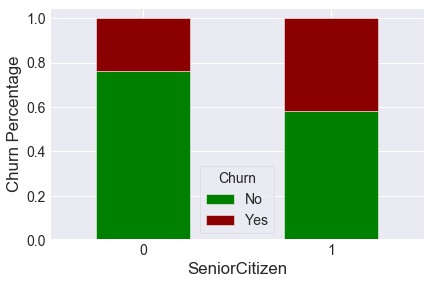

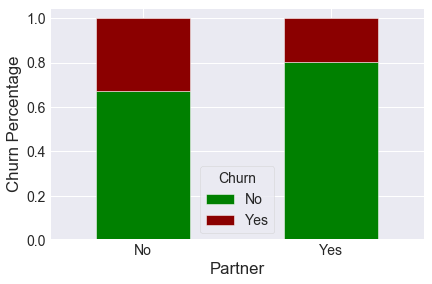

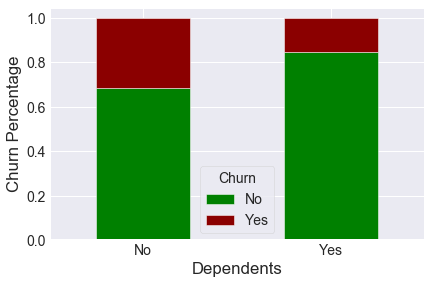

In [289]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

#### Tenure

In [290]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [291]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

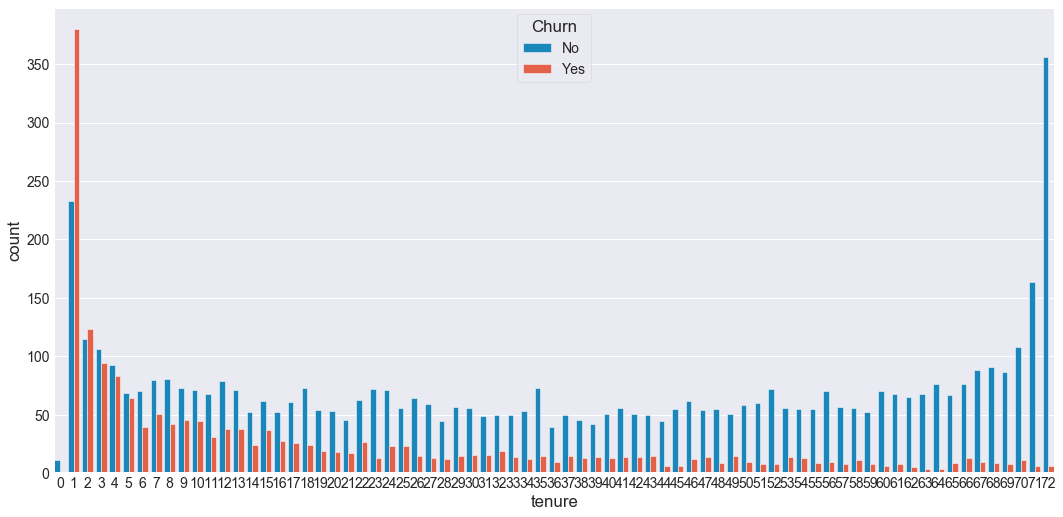

In [292]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate.

In [293]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [294]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

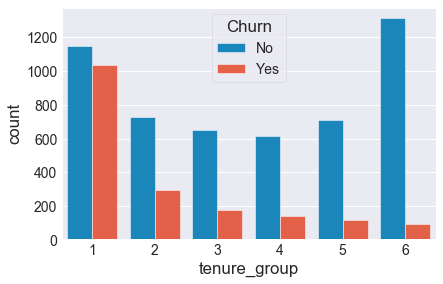

In [295]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

#### Phone Service

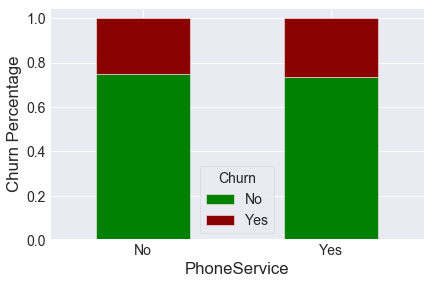

In [296]:
stacked_plot(df, "PhoneService", "Churn")

#### MultipleLines

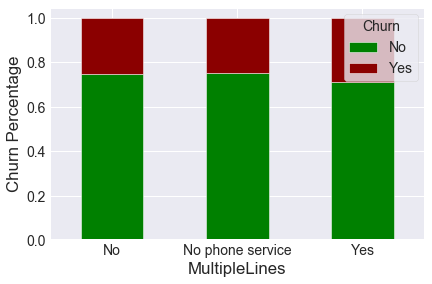

In [297]:
stacked_plot(df, "MultipleLines", "Churn")

In [298]:
df["MultipleLines"] = df["MultipleLines"].replace({'No phone service' : 'No'})

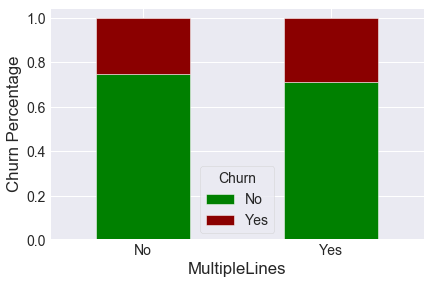

In [299]:
stacked_plot(df, "MultipleLines", "Churn")

#### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

All of these variables have "No Internet Service" as category. We can convert them as "No"

In [300]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for i in cols:
    df[i] = df[i].replace({"No internet service": "No"})

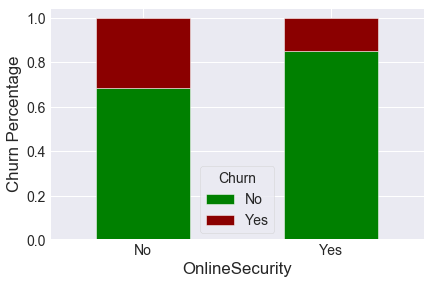

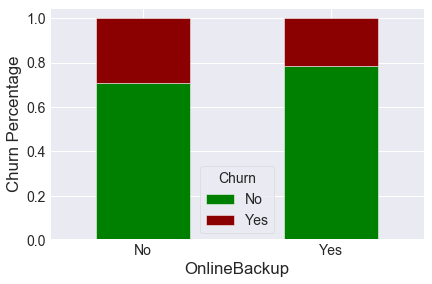

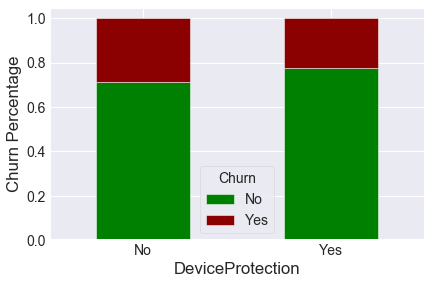

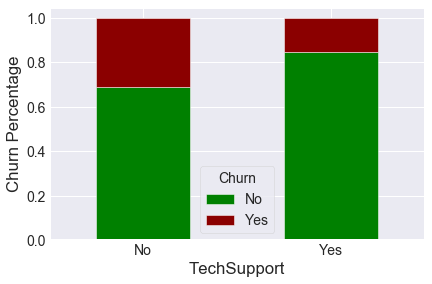

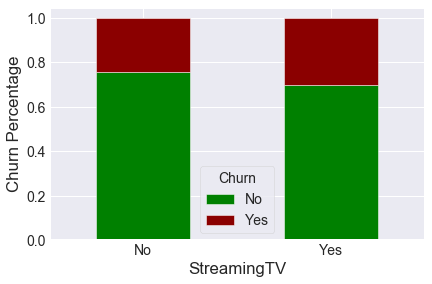

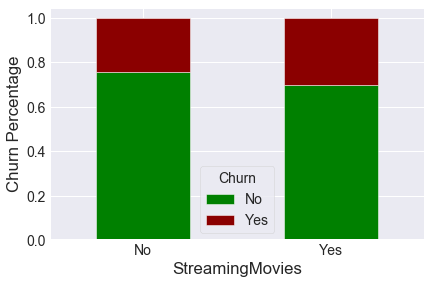

In [301]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

#### InternetService

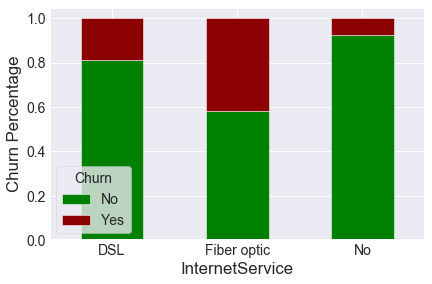

In [302]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high.

#### Contract

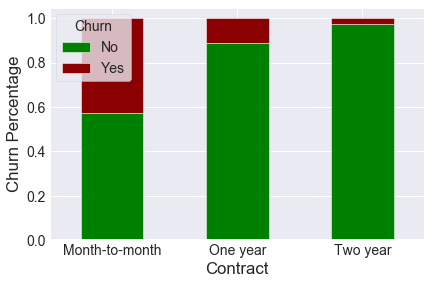

In [303]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high.

#### PaymentMethod

Text(0, 0.5, 'Churn Percentage')

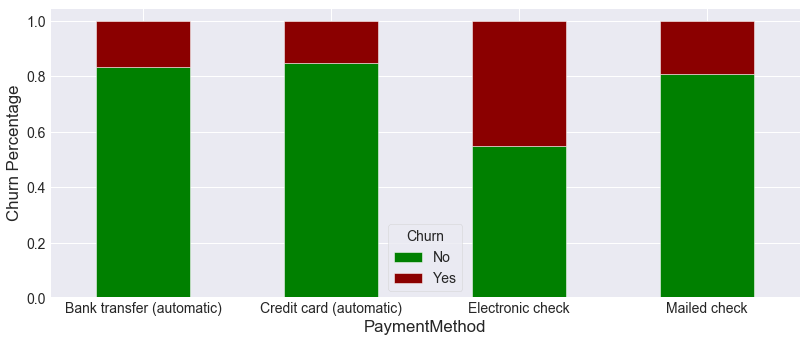

In [304]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage')

In the case of Electronic check, churn is very high. 

#### PaperlessBilling

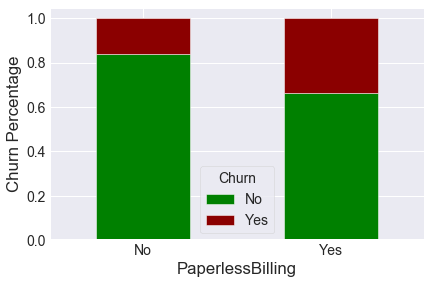

In [305]:
stacked_plot(df, "PaperlessBilling", "Churn")

#### TotalCharges

In [306]:
df.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [307]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [308]:
df['TotalCharges'].isna().sum() 

11

In [309]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,Male,0,No,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.25,NaN,No,1
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.75,NaN,No,1
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,19.85,NaN,No,1
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,25.35,NaN,No,1
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,Two year,No,Mailed check,20.00,NaN,No,1
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,...,No,No,No,One year,Yes,Mailed check,19.70,NaN,No,1
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [310]:
df.TotalCharges[df["TotalCharges"].isnull()] = 0

C:\Users\archd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [311]:
df.isnull().any().any()

False

In [312]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

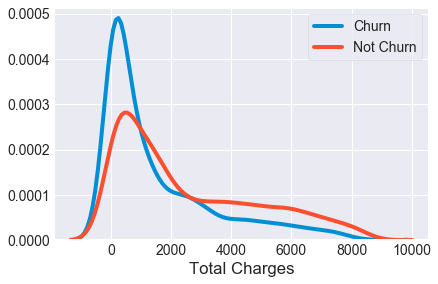

In [313]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

#### Monthly Charges

In [314]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [315]:
df.MonthlyCharges.isna().sum()

0

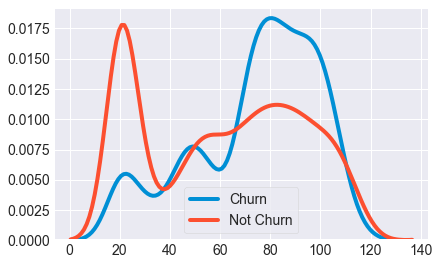

In [316]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

## Finding Correlation

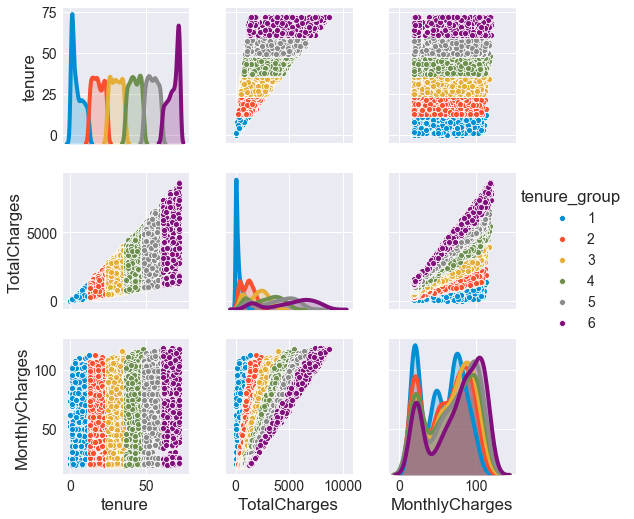

In [317]:
sns.pairplot(df, vars = ['tenure','TotalCharges','MonthlyCharges'], hue = 'tenure_group')

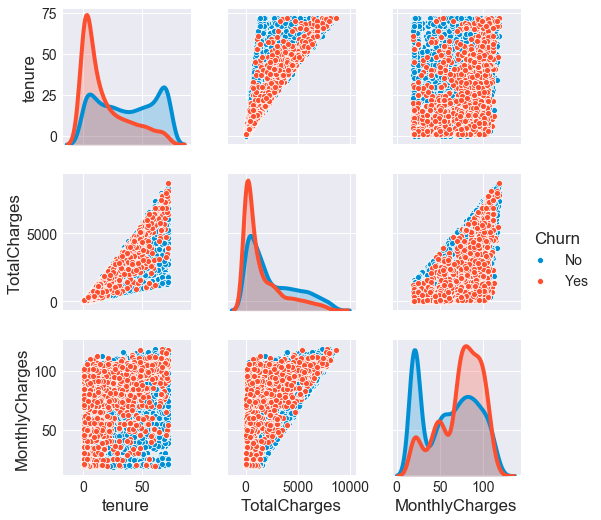

In [318]:
sns.pairplot(df, vars = ['tenure','TotalCharges','MonthlyCharges'], hue = 'Churn')

In [319]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling']

for i in cols:
    df[i] = df[i].apply(lambda x: 0 if x=='No' else 1)

In [320]:
catcols = df.columns[df.dtypes == object]
numcols = df.columns[df.dtypes != object]
print(catcols)
print(numcols)

Index(['Contract', 'PaymentMethod', 'Churn'], dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'tenure_group'],
      dtype='object')


In [321]:
numcols = numcols.drop('tenure_group')
catcols = catcols.drop('Churn')

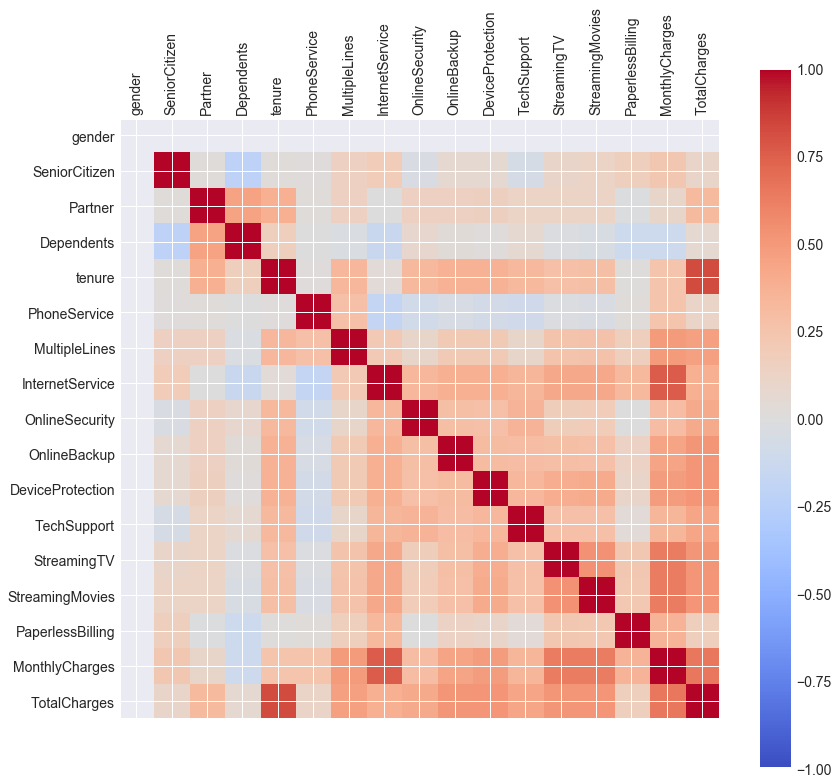

In [322]:
corr = df[numcols].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df[numcols].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df[numcols].columns)
ax.set_yticklabels(df[numcols].columns)
plt.show()

In [323]:
df = pd.get_dummies(df, columns=catcols)

In [324]:
df.shape

(7043, 26)

In [325]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,tenure_group,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,29.85,No,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,1889.50,No,3,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,108.15,Yes,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,1840.75,No,4,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,151.65,Yes,1,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,1,0,0,...,820.50,Yes,1,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,1,0,1,...,1949.40,No,2,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,1,1,0,...,301.90,No,1,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,1,0,0,...,3046.05,Yes,3,1,0,0,0,0,1,0
9,1,0,0,1,62,1,0,1,1,1,...,3487.95,No,6,0,1,0,1,0,0,0


In [326]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)

In [327]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

## Visualizing data with Principal Components

In [328]:
from sklearn.decomposition import PCA

In [329]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(df)

In [330]:
pca_df

array([[-2.25029370e+03, -8.86715582e+00],
       [-3.90257130e+02, -6.25839626e+00],
       [-2.17178344e+03,  1.19076585e+01],
       ...,
       [-1.93363097e+03, -1.47071697e+01],
       [-1.97315333e+03,  2.86930959e+01],
       [ 4.56506773e+03,  4.47952119e+00]])

In [331]:
pca_df.shape

(7043, 2)

In [332]:
pca.explained_variance_

array([5.13915585e+06, 6.28155327e+02])

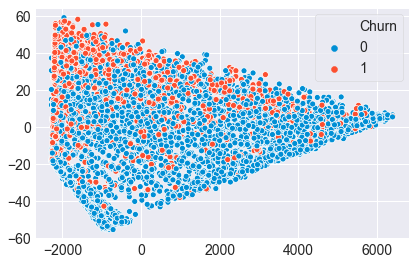

In [333]:
sns.scatterplot(x=pca_df[:,0],y= pca_df[:,1], hue = df.Churn)

## Model Building

In [334]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,tenure_group,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,0,1,...,29.85,0,1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,1889.50,0,3,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,108.15,1,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,1840.75,0,4,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,1,0,0,...,151.65,1,1,1,0,0,0,0,1,0


### Baseline Model

In [343]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [336]:
#removing 'tenure' as we have 'tenure_group'
df.drop(['tenure'],axis=1,inplace=True)

In [337]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [348]:
train,test = train_test_split(df,test_size=0.2,random_state=111, stratify = df['Churn'])

In [349]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [350]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.49      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy   Score :  0.8019872249822569
Area under curve :  0.7038479423389911 



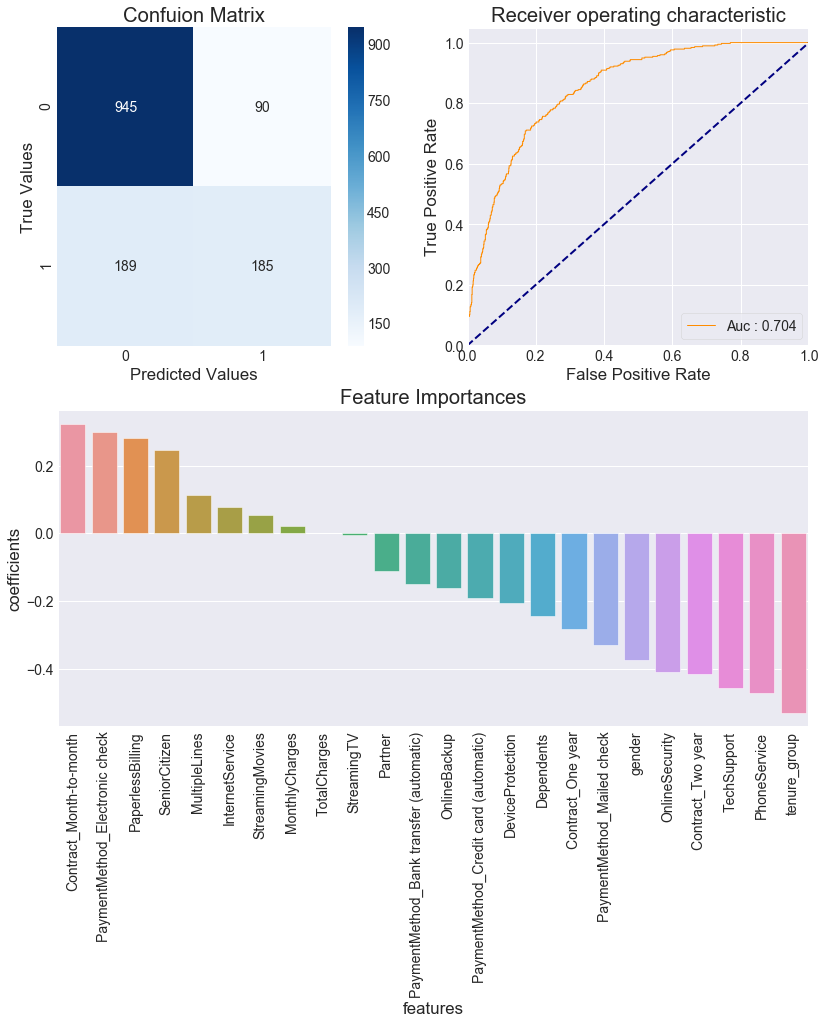

In [351]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit,train_x, train_y, test_x, test_y,
                         x,"coefficients")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

Accuracy   Score :  0.7686302342086586
Area under curve :  0.7468857371670672 



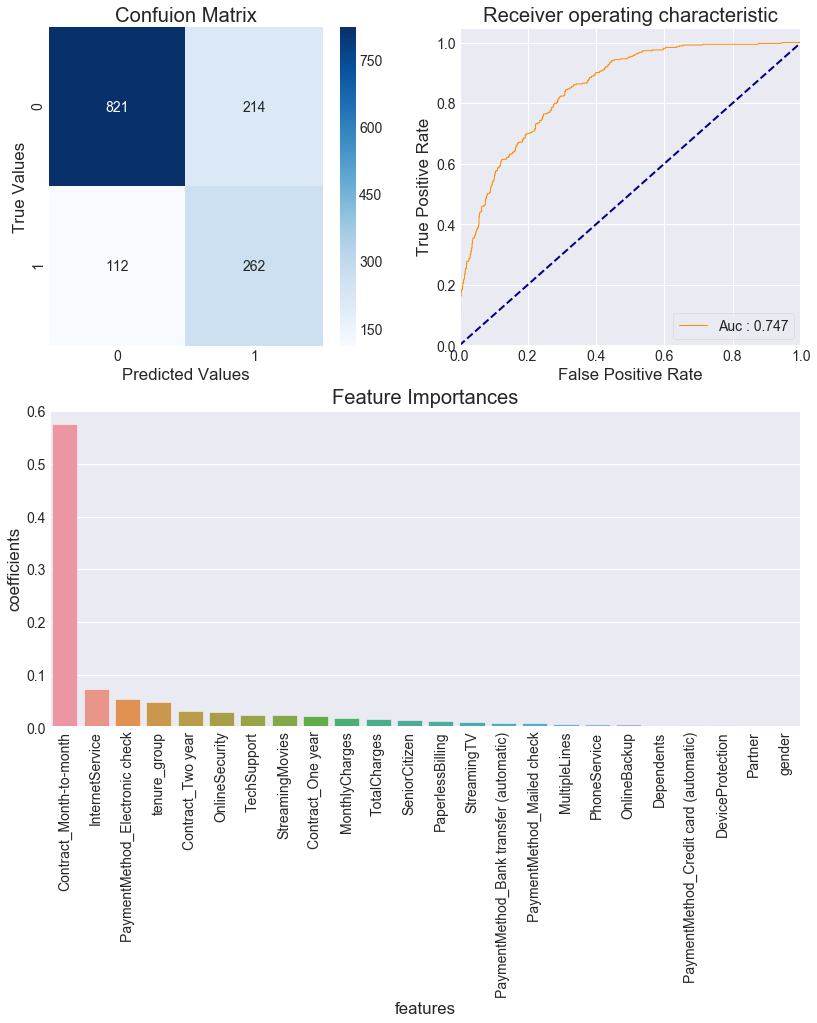

In [355]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight= 2)

churn_prediction(xgb_model,train_x, train_y, test_x, test_y,
                         x,"features")

In [352]:
param_grid = {'min_child_weight':[1, 3, 5],
          'max_depth': [3, 5, 7, 9],
          'n_estimators':[100, 200, 300, 400, 500],
          'subsample': [0.8, 0.9, 1],
          'gamma':[0],
          'reg_alpha':[0.1],
          'reg_lambda':[1],
          'scale_pos_weight':[2]
         }

xgb_model = xgb.XGBClassifier(objective="binary:logistic" )
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=2, cv=2, verbose=1)
grid.fit(train_x, train_y)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   18.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:  5.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po..., seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'gamma': [0], 'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400, 500

In [353]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=2, seed=None,
              silent=None, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.69      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409

Accuracy   Score :  0.7771469127040455
Area under curve :  0.7501214187914955 



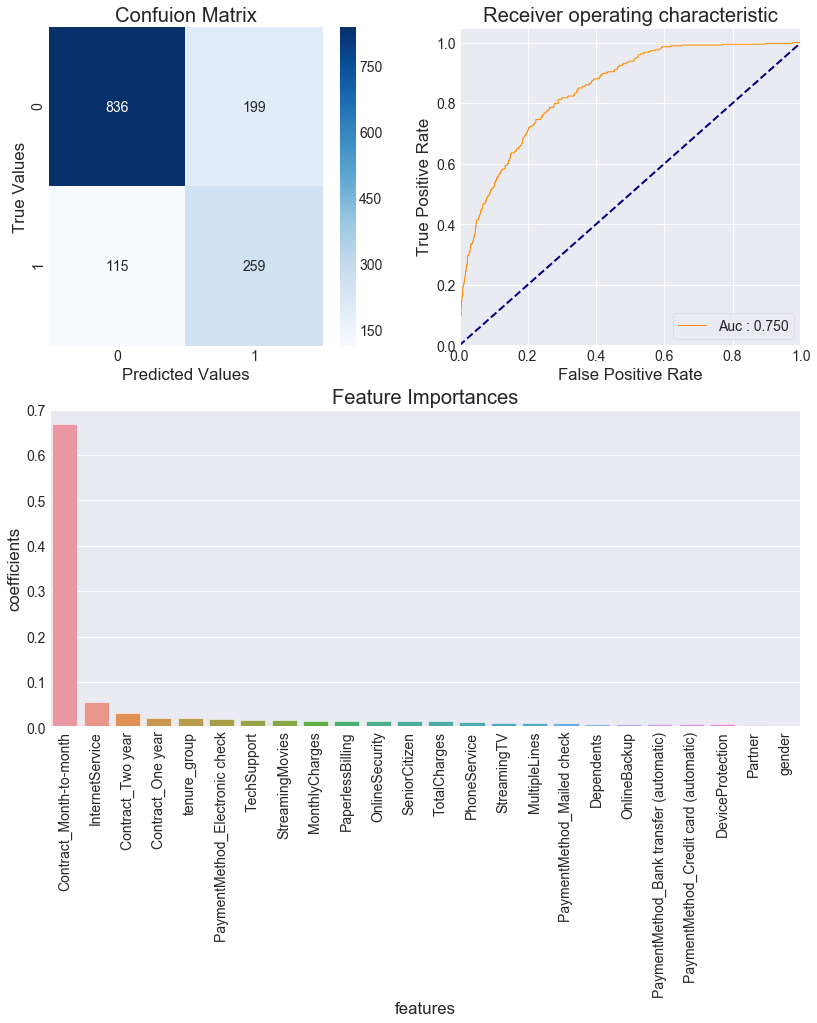

In [354]:
churn_prediction(grid.best_estimator_,train_x, train_y, test_x, test_y,
                         x,"features")

### SMOTE

In [356]:
sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_sample(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.60      0.65      0.63       374

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.79      0.80      1409

Accuracy   Score :  0.7934705464868701
Area under curve :  0.7475716241700897 



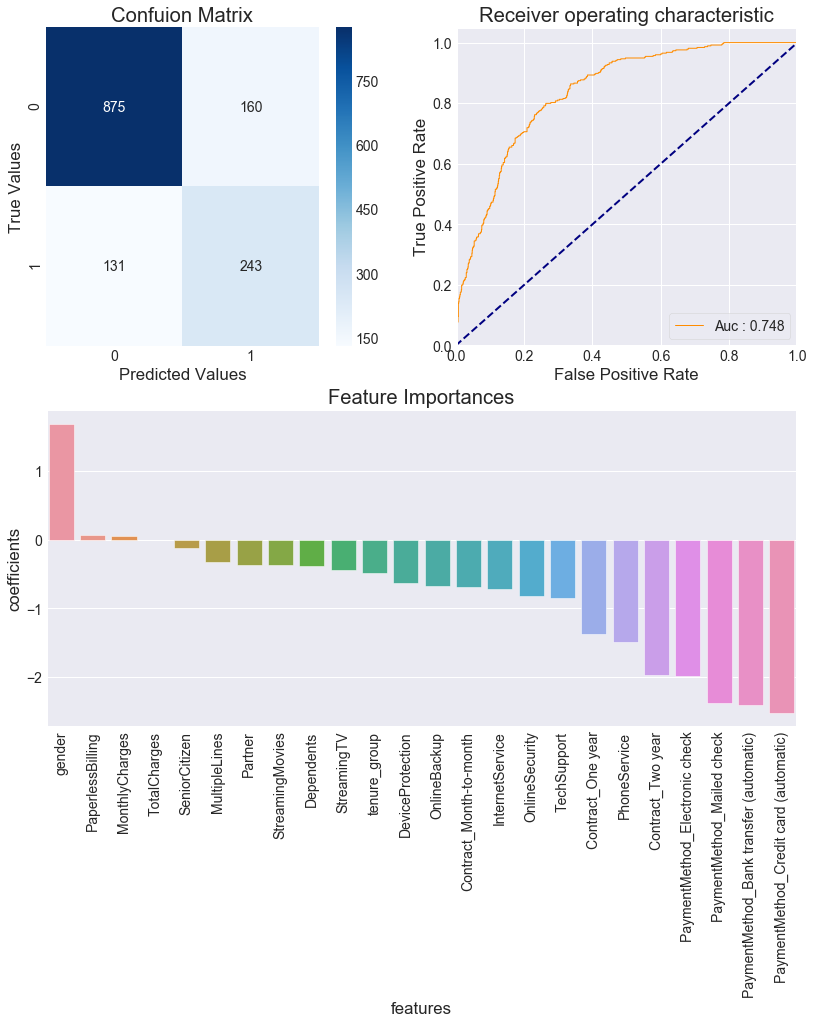

In [384]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit,x_train_r, y_train_r, test_x, test_y,
                         x,"coefficients")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.66      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

Accuracy   Score :  0.7700496806245565
Area under curve :  0.733337208401147 



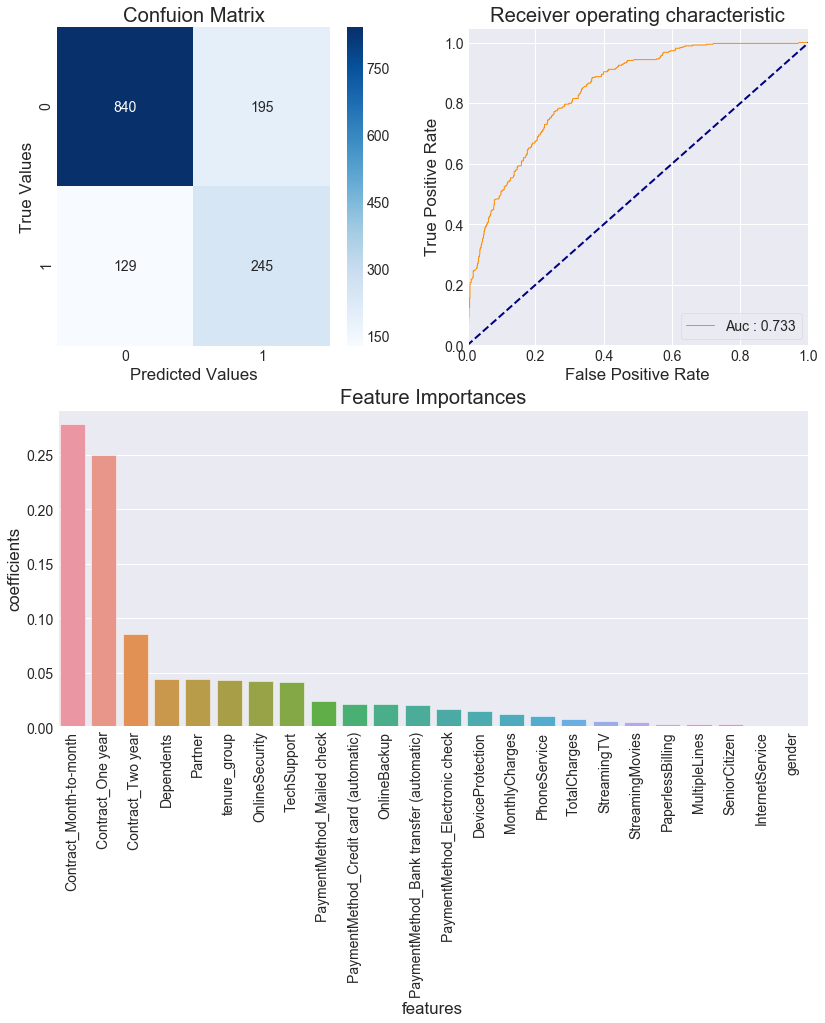

In [358]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")

churn_prediction(xgb_model,x_train_r, y_train_r, test_x, test_y,
                         x,"features")

In [359]:
param_grid = {'min_child_weight':[1, 3, 5],
          'max_depth': [3, 5, 7, 9],
          'n_estimators':[100, 200, 300, 400, 500],
          'subsample': [0.8, 0.9, 1],
          'gamma':[0],
          'reg_alpha':[0.1],
          'reg_lambda':[1]
         }

xgb_model = xgb.XGBClassifier(objective="binary:logistic" )
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=2, cv=2, verbose=1)
grid.fit(x_train_r, y_train_r)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   34.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:  9.6min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'gamma': [0], 'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 4

In [361]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Accuracy   Score :  0.7792760823278921
Area under curve :  0.7225412694722159 



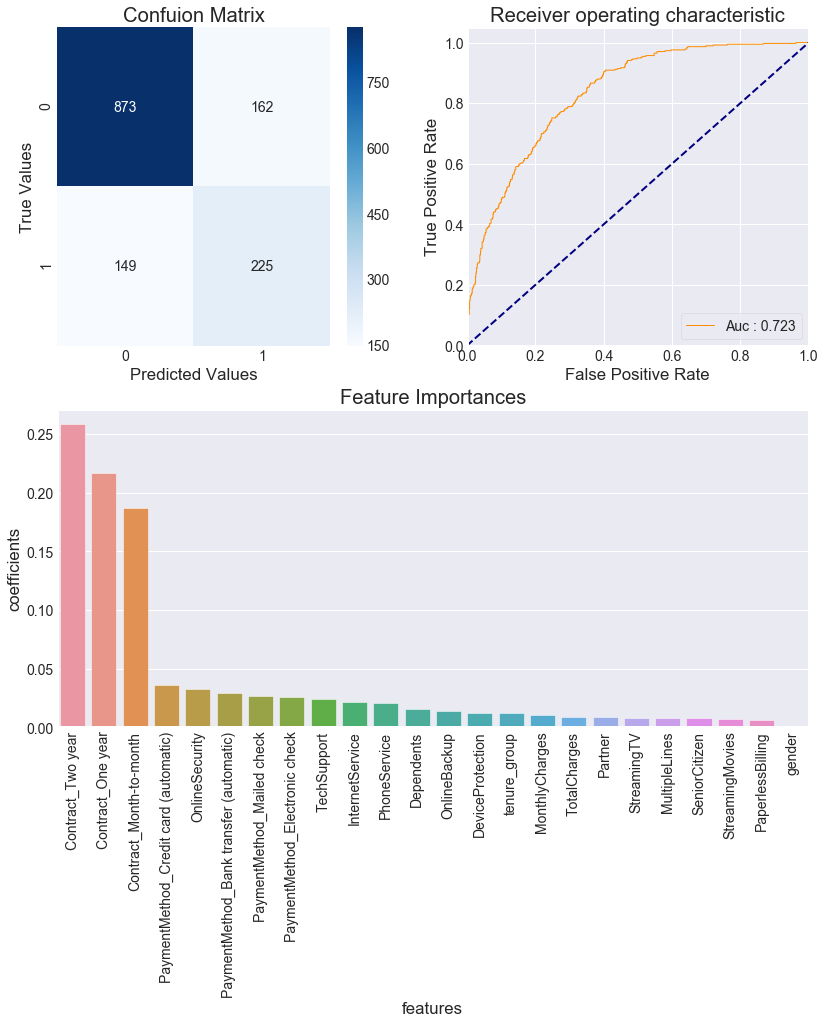

In [362]:
churn_prediction(grid.best_estimator_,x_train_r, y_train_r, test_x, test_y,
                         x,"features")

In [366]:
X_train_r1, X_val, y_train_r1, y_val = train_test_split(x_train_r, y_train_r, train_size=0.8, random_state=0, stratify = y_train_r)

eval_set = [(X_val, y_val)]

xgb_model = xgb.XGBClassifier(objective="binary:logistic" )
xgb_model.fit(X_train_r1, y_train_r1, eval_metric=["error", "auc"], eval_set = eval_set, verbose = True, early_stopping_rounds=10)

[0]	validation_0-error:0.222222	validation_0-auc:0.82656
Multiple eval metrics have been passed: 'validation_0-auc' will be used for early stopping.

Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-error:0.222222	validation_0-auc:0.869433
[2]	validation_0-error:0.219807	validation_0-auc:0.875633
[3]	validation_0-error:0.221618	validation_0-auc:0.875311
[4]	validation_0-error:0.218599	validation_0-auc:0.876169
[5]	validation_0-error:0.219203	validation_0-auc:0.879175
[6]	validation_0-error:0.216787	validation_0-auc:0.883405
[7]	validation_0-error:0.217391	validation_0-auc:0.886926
[8]	validation_0-error:0.210749	validation_0-auc:0.889098
[9]	validation_0-error:0.202295	validation_0-auc:0.889222
[10]	validation_0-error:0.199879	validation_0-auc:0.892956
[11]	validation_0-error:0.196256	validation_0-auc:0.894149
[12]	validation_0-error:0.192633	validation_0-auc:0.895043
[13]	validation_0-error:0.193237	validation_0-auc:0.896358
[14]	validation_0-error:0.19

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [367]:
preds = xgb_model.predict(test_x)

print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



In [369]:
accuracy_score(test_y, preds)

0.7700496806245565

In [368]:
roc_auc_score(test_y, preds)

0.7299219819680177

## Random Forest

In [414]:
param_grid = {
          'max_depth': [3, 5, 7, 9, 11, 13, 15],
          'n_estimators':[100, 300, 500, 700, 900, 1100]    
         }

rf_model = RandomForestClassifier()
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, n_jobs=2, cv=2, verbose=1)
grid.fit(x_train_r, y_train_r)

Fitting 2 folds for each of 42 candidates, totalling 84 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.5s
[Parallel(n_jobs=2)]: Done  84 out of  84 | elapsed:  1.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.57      0.64      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

Accuracy   Score :  0.7743080198722498
Area under curve :  0.7311129194760909 



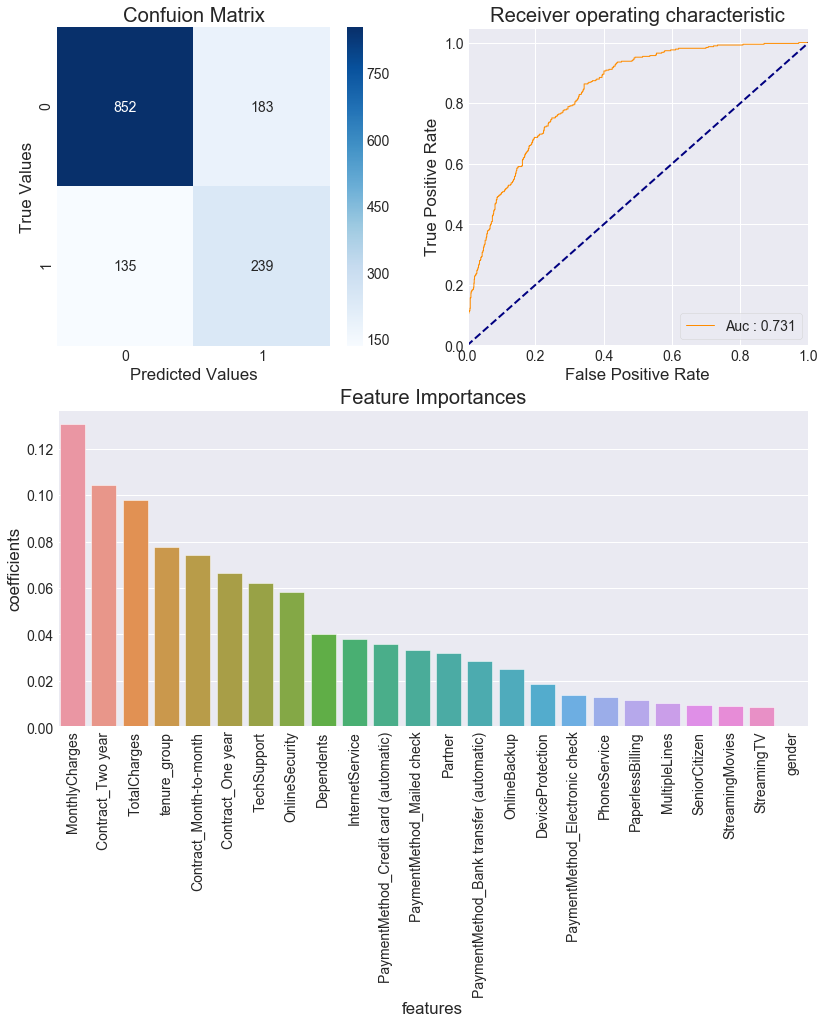

In [415]:
churn_prediction(grid.best_estimator_,x_train_r, y_train_r, test_x, test_y,
                         x,"features")

In [417]:
rf = grid.best_estimator_
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Explaining Model

In [416]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

In [418]:
perm = PermutationImportance(rf, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist(), top = 25)

Weight,Feature
0.0390 ± 0.0081,MonthlyCharges
0.0271 ± 0.0059,Contract_One year
0.0217 ± 0.0087,Contract_Two year
0.0119 ± 0.0080,PaymentMethod_Mailed check
0.0099 ± 0.0076,Contract_Month-to-month
0.0099 ± 0.0048,PaymentMethod_Credit card (automatic)
0.0065 ± 0.0028,PaymentMethod_Bank transfer (automatic)
0.0051 ± 0.0071,OnlineSecurity
0.0037 ± 0.0169,TechSupport
0.0035 ± 0.0035,InternetService


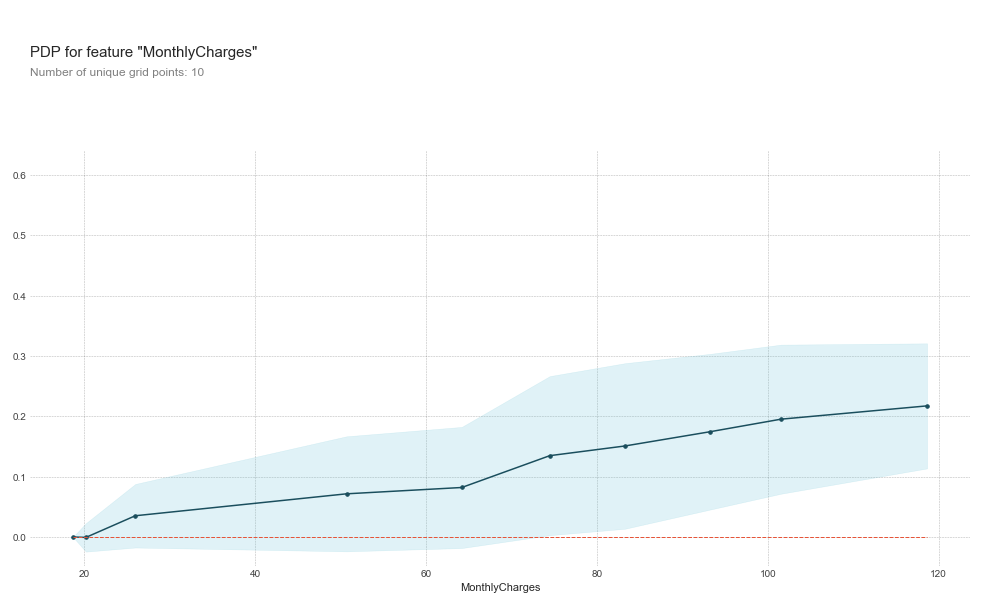

In [419]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

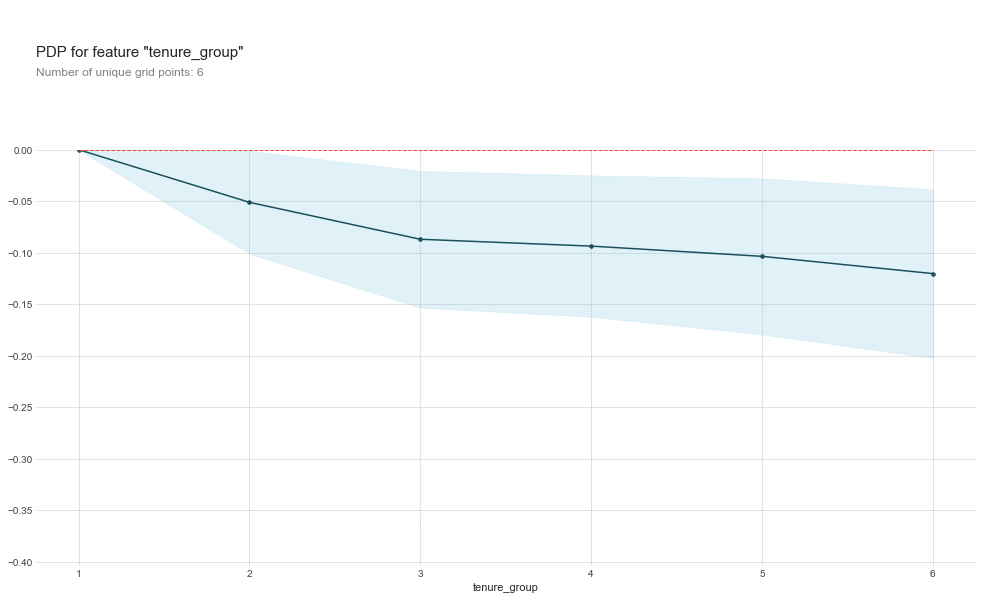

In [420]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='tenure_group')
pdp.pdp_plot(pdp_p, 'tenure_group')
plt.show()

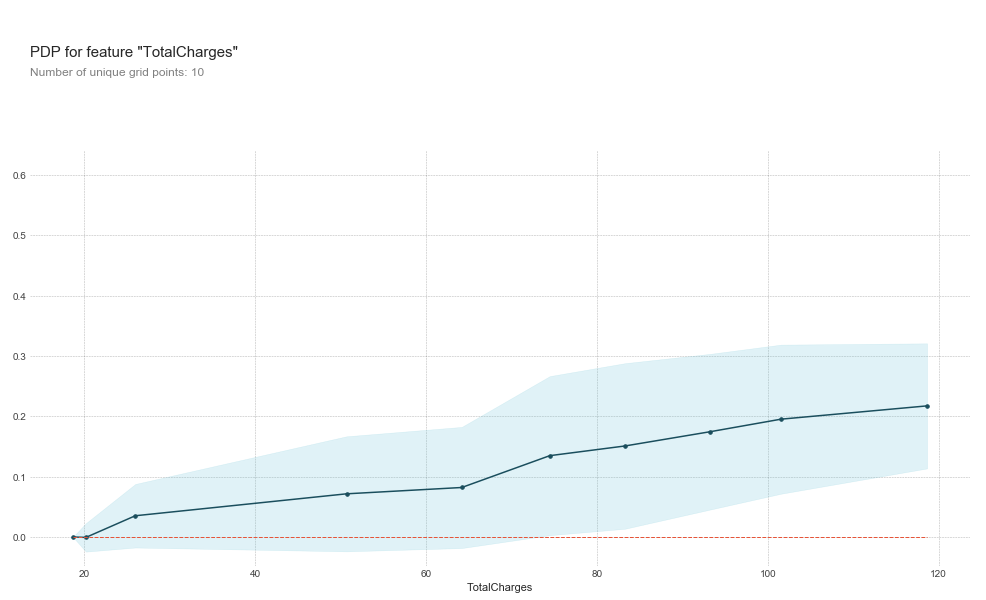

In [421]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'TotalCharges')
plt.show()

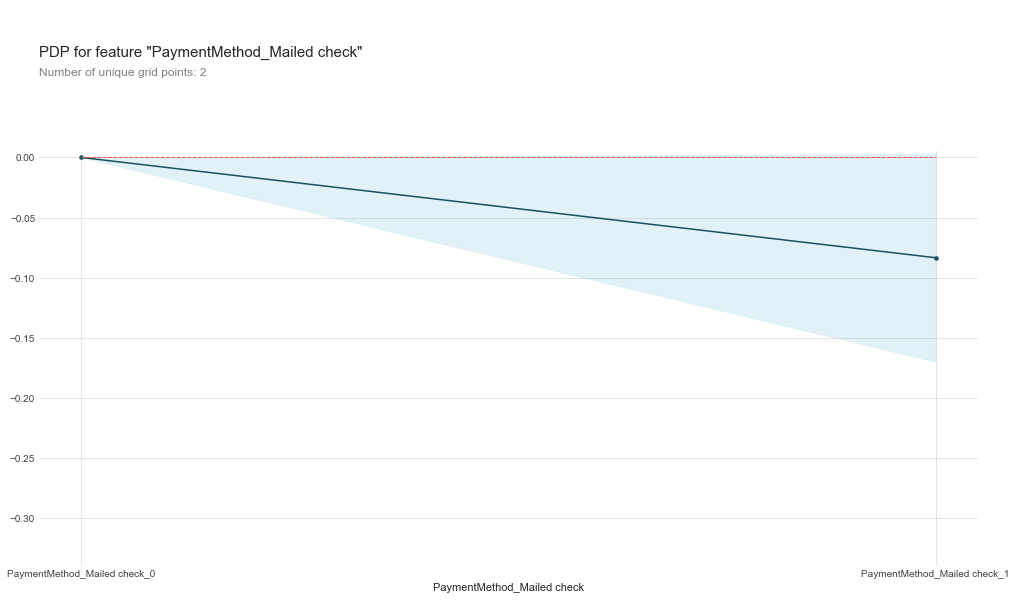

In [423]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='PaymentMethod_Mailed check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Mailed check')
plt.show()

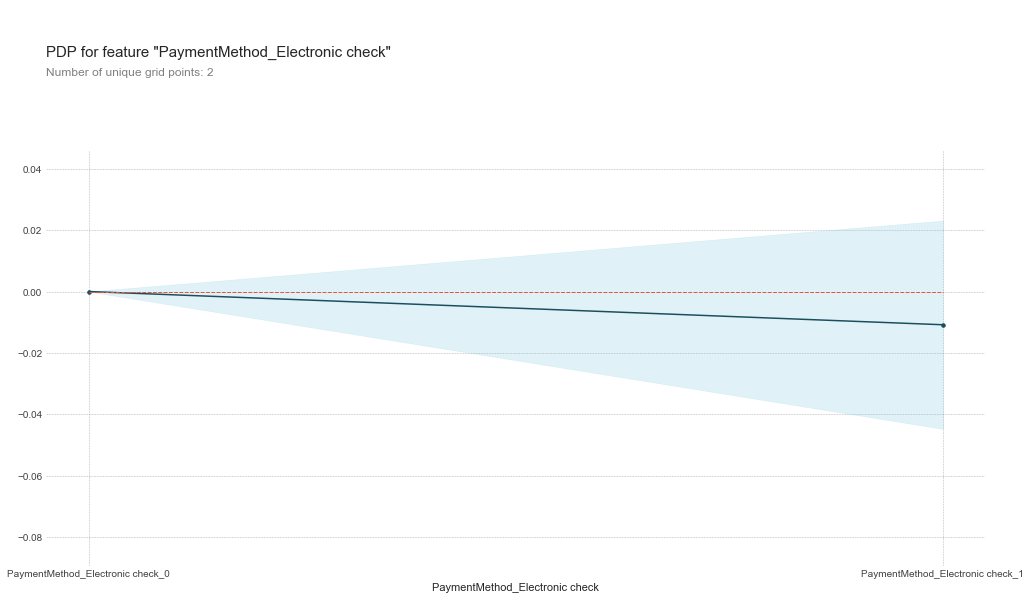

In [424]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='PaymentMethod_Electronic check')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Electronic check')
plt.show()

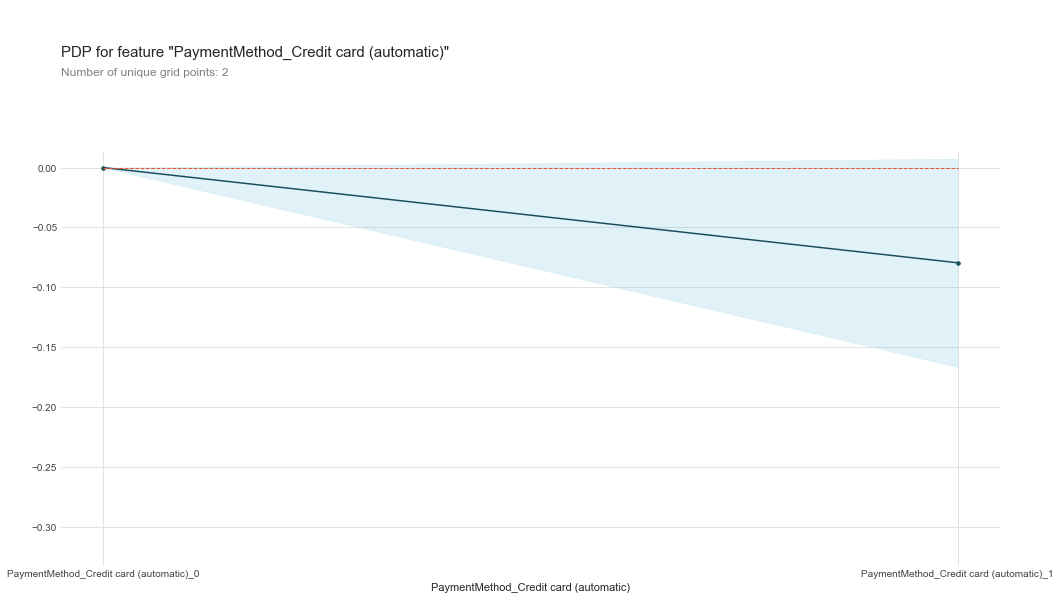

In [425]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='PaymentMethod_Credit card (automatic)')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Credit card (automatic)')
plt.show()

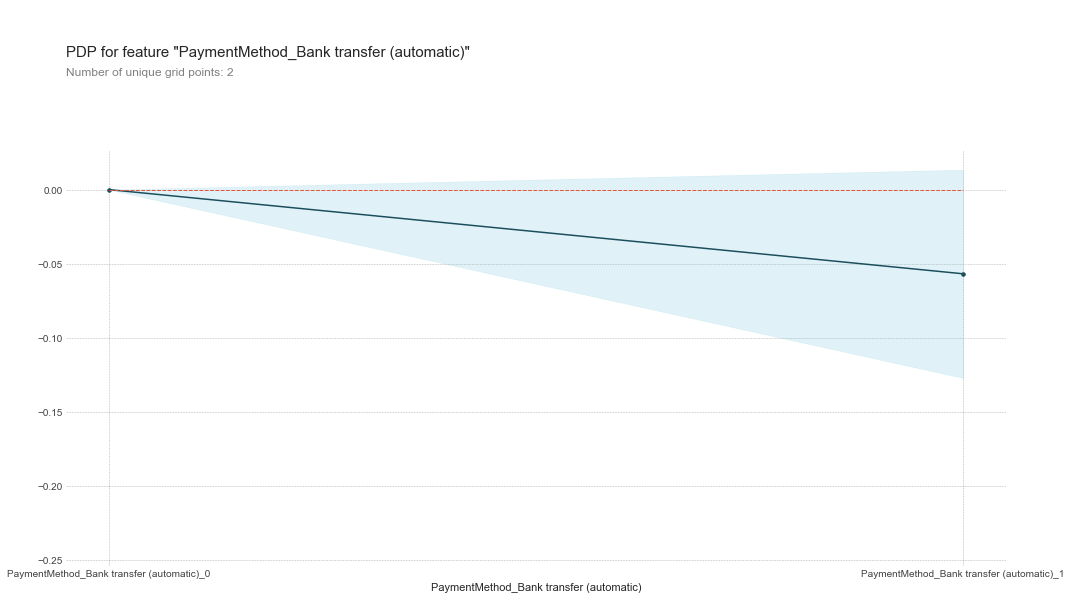

In [426]:
pdp_p = pdp.pdp_isolate(model=rf, dataset=test_x, model_features=test_x.columns.values, feature='PaymentMethod_Bank transfer (automatic)')
pdp.pdp_plot(pdp_p, 'PaymentMethod_Bank transfer (automatic)')
plt.show()

In [428]:
test_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'tenure_group',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [399]:
import shap  # package used to calculate Shap values
shap.initjs()

In [429]:
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(test_x.iloc[0])
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], test_x.iloc[0])

In [506]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))

### Dial Chart

In [499]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]
        

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

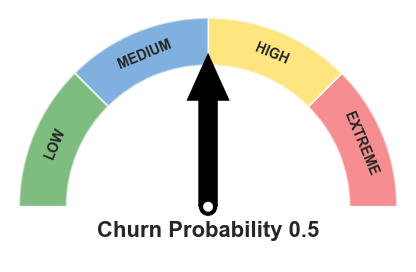

In [505]:
gauge(Probability=0.5)

In [491]:
test_x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'tenure_group',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')